In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [45]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

print("Shape of images:", digits.images.shape)   
print("Shape of data:", digits.data.shape)       
print("Target classes:", np.unique(digits.target))  
print("Total samples:", len(digits.data))

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
Total samples: 1797


## 2. Data Visualization

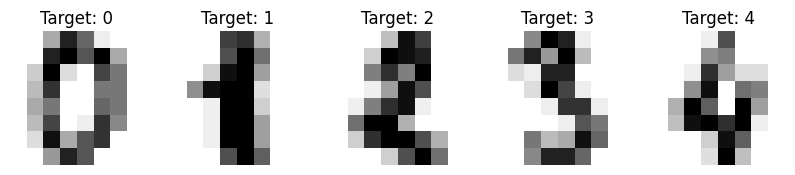

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Target: {label}')
    ax.axis('off')

plt.show()

## 3. Preprocessing

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Model Building

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

## 5. PC's Visualization

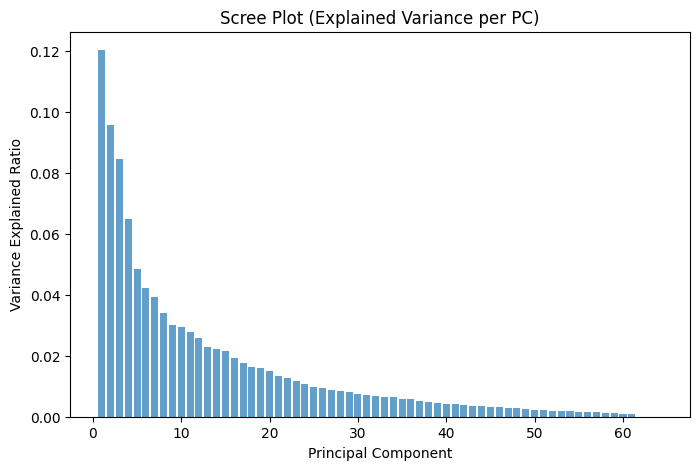

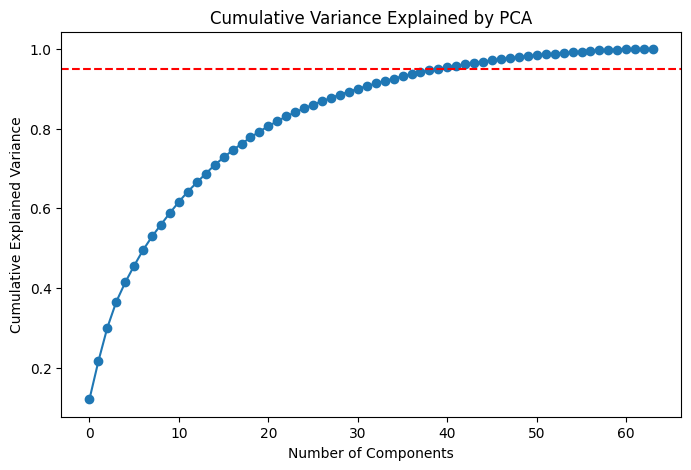

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../outputs/results', exist_ok=True)
os.makedirs('../outputs/models', exist_ok=True)

# Scree plot
plt.figure(figsize=(8,5))
plt.bar(range(1, 65), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Scree Plot (Explained Variance per PC)')
plt.savefig('../outputs/results/scree_plot.png')
plt.show()

# Cumulative variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line
plt.savefig('../outputs/results/pca_cumsum.png')
plt.show()

## 6. PCA with 2 components

Variance explained by first 2 PCs = 0.216



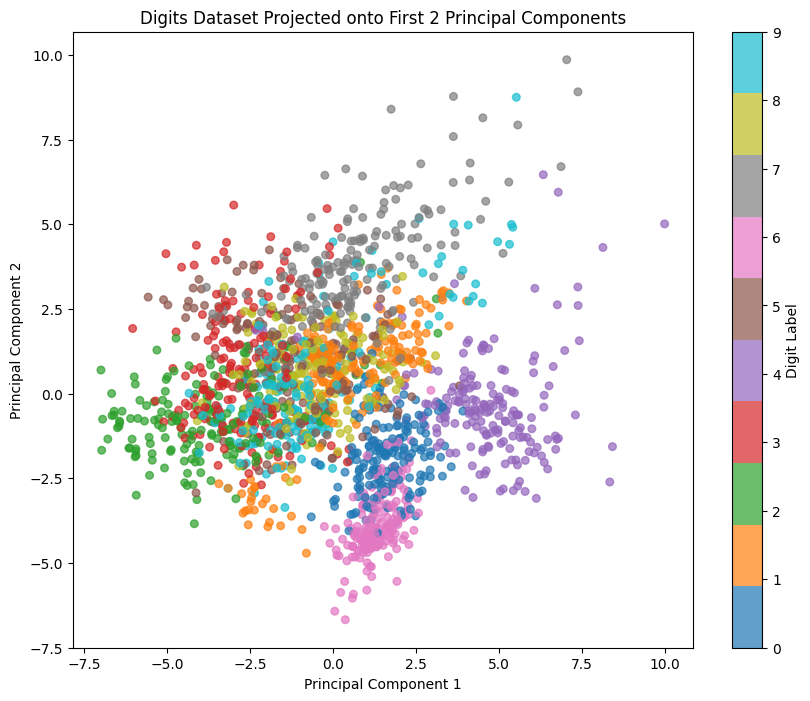

In [50]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

explained_variance = pca_2d.explained_variance_ratio_
variance = explained_variance.sum()
print(f"Variance explained by first 2 PCs = {variance:.3f}\n")

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], 
                      c=y, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.7, s=30)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Digits Dataset Projected onto First 2 Principal Components")
plt.colorbar(scatter, label="Digit Label")
plt.savefig('../outputs/results/pca_2_components.png')
plt.show()

## 7. PCA with 3 components

Variance explained by first 3 PCs = 0.300



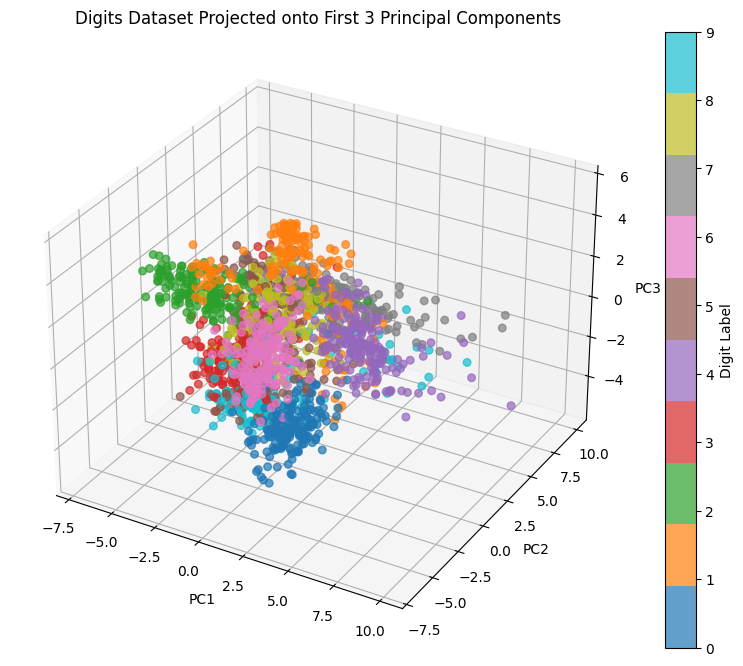

In [51]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

explained_variance = pca_3d.explained_variance_ratio_
variance = explained_variance.sum()
print(f"Variance explained by first 3 PCs = {variance:.3f}\n")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], 
                     c=y, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.7, s=30)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Digits Dataset Projected onto First 3 Principal Components")
plt.colorbar(scatter, label="Digit Label")
plt.savefig('../outputs/results/pca_3_components.png')
plt.show()

## 8. Load and Save Model

In [52]:
import joblib

joblib.dump(pca, '../outputs/models/pca.pkl')
joblib.dump(pca_2d, '../outputs/models/pca_2.pkl')
joblib.dump(pca_3d, '../outputs/models/pca_3.pkl')

print("Model Saved Successfully")

model = joblib.load('../outputs/models/pca.pkl')

Model Saved Successfully
